# 0 Demonstrating the main function calls we use during feature extraction 

A useful set of simple examples to show how to call the models and parse the data they return.

## 0.1 Demo data

Where will we find videos, images and audio for our examples? Two videos, the associate audio files and a set of images are available in the `data\demo` directory.

In [4]:
import os

demo_data = os.path.join("..","data", "demo")

#a couple of videos for testing
VIDEO_FILE  = os.path.join(demo_data, "2UWdXP.joke1.rep2.take1.Peekaboo.mp4")
VIDEO_FILE2 = os.path.join(demo_data, "2UWdXP.joke2.rep1.take1.NomNomNom.mp4")

AUDIO_FILE = os.path.join(demo_data, "2UWdXP.joke1.rep2.take1.Peekaboo.mp3")
AUDIO_FILE2 = os.path.join(demo_data, "2UWdXP.joke2.rep1.take1.NomNomNom.mp3")

IMAGE1 = os.path.join(demo_data, "mother-and-baby.jpg")
IMAGE2 = os.path.join(demo_data, "peekaboo.png")
IMAGE3 = os.path.join(demo_data, "twopeople.jpg")

videoset = [VIDEO_FILE, VIDEO_FILE2] 
audioset = [AUDIO_FILE, AUDIO_FILE2] 
photoset = [IMAGE1, IMAGE2, IMAGE3]


## 0.1 YOLOv8

Go to [docs.ultralytics.com](https://docs.ultralytics.com/) for detailed documentation and lots of examples. We just demo a few here.


In [2]:
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import calcs  # local calcs.py contains some helper functions
import utils   # local utils.py contains some helper functions
import display # local display.py contains display helper functions

### 0.1.1 Pose estimation

In [5]:
#use a yolo model with pose estimation
model = YOLO('yolov8n-pose.pt')

#the results will contain object detection and pose estimation data.
results = model(IMAGE3)
print(results)


image 1/1 /usr/src/babyjoke/code/../data/demo/twopeople.jpg: 448x640 2 persons, 75.8ms
Speed: 4.1ms preprocess, 75.8ms inference, 7.1ms postprocess per image at shape (1, 3, 448, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'person'}
obb: None
orig_img: array([[[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [241, 237, 236],
        [241, 237, 236],
        [241, 237, 236]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [241, 237, 236],
        [241, 237, 236],
        [241, 237, 236]],

       [[246, 242, 241],
        [246, 242, 241],
        [246, 242, 241],
        ...,
        [241, 237, 236],
        [241, 237, 236],
        [241, 237, 236]],

       ...,

       [[126, 133, 136],
        [127, 134, 137],
        [127, 134, 137],
        ...,
   

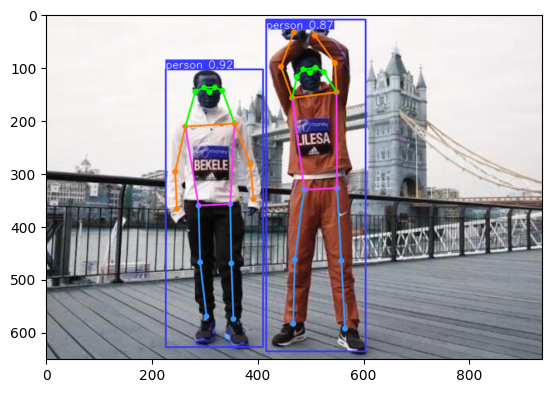

[[[     309.76      147.44]
  [     319.51      138.03]
  [     298.74      138.75]
  [     333.81      144.31]
  [     282.27      146.63]
  [     356.89       206.9]
  [     263.73       212.8]
  [      386.5      283.64]
  [     244.98      297.84]
  [     392.56      349.91]
  [     247.85      367.22]
  [     348.61      358.84]
  [     288.82      361.12]
  [     350.77      470.76]
  [     291.12      468.98]
  [      354.6      575.16]
  [     303.53      570.97]]

 [[     499.67      110.29]
  [     509.27      101.52]
  [      486.8      104.78]
  [     525.17      109.19]
  [     474.28      118.13]
  [     549.22      147.39]
  [     465.17      158.22]
  [     546.91      92.659]
  [     444.56      99.364]
  [     508.26      40.892]
  [     468.33      34.489]
  [     550.81      328.05]
  [     488.78       331.7]
  [     558.06      465.14]
  [     470.75      463.25]
  [     565.13      593.19]
  [     467.59      584.03]]]
[[    0.98947     0.95855     0.96956     0.

In [6]:
#automatically display image overlayed with keypoints, skeleton and bounding boxes
labelledimage = results[0].plot()
plt.imshow(labelledimage)
plt.show()

#get the keypoints as a numpy arrays of x,y coordinates each with a confidence score.
#note yolo returns tensors so we have to convert to numpy
keypoints = results[0].keypoints.cpu().numpy()
print(keypoints.xy)
print(keypoints.conf)
print(keypoints.data)

In [7]:
#yolo returns keypoints as a 3 x 17 tensor of x,y,confidence, we typically flatten it to a 51 element list to store in dataframes
xyc = keypoints.data[0].flatten().tolist()
print(xyc)

[309.7644958496094, 147.44114685058594, 0.9894695281982422, 319.5118103027344, 138.02676391601562, 0.958551824092865, 298.7419128417969, 138.7523193359375, 0.9695618152618408, 333.8133239746094, 144.3069610595703, 0.7805280089378357, 282.2679443359375, 146.63267517089844, 0.8468091487884521, 356.887451171875, 206.89889526367188, 0.9967177510261536, 263.7287292480469, 212.7962188720703, 0.9981535077095032, 386.5010681152344, 283.64385986328125, 0.9809610247612, 244.9801483154297, 297.8372497558594, 0.9903420209884644, 392.563720703125, 349.9128723144531, 0.9685064554214478, 247.85110473632812, 367.21893310546875, 0.981090784072876, 348.6077575683594, 358.84130859375, 0.9991661310195923, 288.8248596191406, 361.1241455078125, 0.999357283115387, 350.77386474609375, 470.7572937011719, 0.9979129433631897, 291.119384765625, 468.97601318359375, 0.9985093474388123, 354.60028076171875, 575.1646728515625, 0.9864956140518188, 303.52813720703125, 570.9740600585938, 0.9896252751350403]


# 0.1.2 YOLOv8 video -> keypoints dataframe

If we pass model a video rather than image, the results object must be iterated over to get the results for each frame.

We extract movement and save it to dataframe using our own helper functions: 

* `utils.createkeypointsdf` - initialise an empty keypoints dataframe
* `utils.addkeypointstodf` - adds keypoints to dataframe
* `utils.videotodf` - extracts keypoints from video and saves to dataframe



In [8]:
results = model(VIDEO_FILE, stream=True)
df = utils.createkeypointsdf()
frame = 0
for r in results:
    #print(torch.flatten(r.keypoints.xy[0]).tolist())
    df = utils.addkeypointstodf(df,frame,r.boxes.xywh,r.boxes.conf,r.keypoints.data)  
    frame += 1

print(f"Video {VIDEO_FILE} has {frame} frames and {len(df)} rows of data")
df.head()


video 1/1 (1/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 61.7ms
video 1/1 (2/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 34.1ms
video 1/1 (3/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 23.5ms
video 1/1 (4/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 24.4ms
video 1/1 (5/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 25.8ms
video 1/1 (6/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 23.8ms
video 1/1 (7/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 27.4ms
video 1/1 (8/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 23.8ms
video 1/1 (9/217) /usr/src/babyjoke/code/../data/demo/2

frame person  index  bbox.x1  bbox.y1  bbox.x2  bbox.y2    bbox.c  \
0      0  child      0    373.0     64.0    640.0    480.0  0.814496   
1      0  adult      1      0.0    315.0    460.0    480.0  0.522835   
2      1  child      0    384.0     63.0    640.0    480.0  0.846705   
3      1  adult      1      0.0    315.0    456.0    480.0  0.569619   
4      2  child      0    394.0     60.0    640.0    480.0  0.762082   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992218  320.262756  ...     0.002259           0.0           0.0   
1  348.465393  456.628021  ...     0.038359           0.0           0.0   
2  429.151093  315.061981  ...     0.001489           0.0           0.0   
3  364.958160  480.000000  ...     0.043196           0.0           0.0   
4  447.805634  312.517853  ...     0.001132           0.0           0.0   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121           0.0           0.0      0.002614            0.0   
1      0.066367           0.0           0.0      0.055381            0.0   
2      0.005873           0.0           0.0      0.002503            0.0   
3      0.067392           0.0           0.0      0.073379            0.0   
4      0.004892           0.0           0.0      0.001508            0.0   

   right_ankle.y  right_ankle.c  
0            0.0       0.006508  
1            0.0       0.073323  
2            0.0       0.008185  
3            0.0       0.085528  
4            0.0       0.005159  

[5 rows x 59 columns]

Our keypoints dataframe has the following structure

![keypoints dataframe](../docs/keypointsdf.png)

For each video `frame`, we have one row person `person` and `index`. The next five columns describe the bounding box for that person marked by it's top left `(x1,y1)` and bottom right `(x2,y2)` corners. This is followed 51 columns representing 17 COCO pose points each labelled with `(x,y)` coordinate and a confidence `c` between (0,1).

In [9]:
df = utils.videotokeypoints(model, VIDEO_FILE, track=False)
df.head()


video 1/1 (1/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 30.9ms
video 1/1 (2/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 29.9ms
video 1/1 (3/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 23.1ms
video 1/1 (4/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 26.0ms
video 1/1 (5/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 24.7ms
video 1/1 (6/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 29.9ms
video 1/1 (7/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 24.4ms
video 1/1 (8/217) /usr/src/babyjoke/code/../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.mp4: 480x640 2 persons, 28.5ms
video 1/1 (9/217) /usr/src/babyjoke/code/../data/demo/2

frame person  index  bbox.x1  bbox.y1  bbox.x2  bbox.y2    bbox.c  \
0      0  child      0    373.0     64.0    640.0    480.0  0.814496   
1      0  adult      1      0.0    315.0    460.0    480.0  0.522835   
2      1  child      0    384.0     63.0    640.0    480.0  0.846705   
3      1  adult      1      0.0    315.0    456.0    480.0  0.569619   
4      2  child      0    394.0     60.0    640.0    480.0  0.762082   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992218  320.262756  ...     0.002259           0.0           0.0   
1  348.465393  456.628021  ...     0.038359           0.0           0.0   
2  429.151093  315.061981  ...     0.001489           0.0           0.0   
3  364.958160  480.000000  ...     0.043196           0.0           0.0   
4  447.805634  312.517853  ...     0.001132           0.0           0.0   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121           0.0           0.0      0.002614            0.0   
1      0.066367           0.0           0.0      0.055381            0.0   
2      0.005873           0.0           0.0      0.002503            0.0   
3      0.067392           0.0           0.0      0.073379            0.0   
4      0.004892           0.0           0.0      0.001508            0.0   

   right_ankle.y  right_ankle.c  
0            0.0       0.006508  
1            0.0       0.073323  
2            0.0       0.008185  
3            0.0       0.085528  
4            0.0       0.005159  

[5 rows x 59 columns]

In [10]:
stemname = os.path.splitext(VIDEO_FILE)[0]
csvpath = stemname + ".csv"
df.to_csv(csvpath, index=False)

df = pd.read_csv(csvpath, index_col=None)
df.head()

frame person  index  bbox.x1  bbox.y1  bbox.x2  bbox.y2    bbox.c  \
0      0  child      0    373.0     64.0    640.0    480.0  0.814496   
1      0  adult      1      0.0    315.0    460.0    480.0  0.522835   
2      1  child      0    384.0     63.0    640.0    480.0  0.846705   
3      1  adult      1      0.0    315.0    456.0    480.0  0.569619   
4      2  child      0    394.0     60.0    640.0    480.0  0.762082   

       nose.x      nose.y  ...  left_knee.c  right_knee.x  right_knee.y  \
0  414.992218  320.262756  ...     0.002259           0.0           0.0   
1  348.465393  456.628021  ...     0.038359           0.0           0.0   
2  429.151093  315.061981  ...     0.001489           0.0           0.0   
3  364.958160  480.000000  ...     0.043196           0.0           0.0   
4  447.805634  312.517853  ...     0.001132           0.0           0.0   

   right_knee.c  left_ankle.x  left_ankle.y  left_ankle.c  right_ankle.x  \
0      0.006121           0.0           0.0      0.002614            0.0   
1      0.066367           0.0           0.0      0.055381            0.0   
2      0.005873           0.0           0.0      0.002503            0.0   
3      0.067392           0.0           0.0      0.073379            0.0   
4      0.004892           0.0           0.0      0.001508            0.0   

   right_ankle.y  right_ankle.c  
0            0.0       0.006508  
1            0.0       0.073323  
2            0.0       0.008185  
3            0.0       0.085528  
4            0.0       0.005159  

[5 rows x 59 columns]

## Displaying data 

Two functions help display keypoint and other data overlayed on frame. 

* `utils.getframekpts` takes keypoints dataframe and framenumber and returns list of all bounding boxes, their labels and corresponding keypoints.
* `display.drawOneFrame` takes thes outputs and draws them on the frame.

['child: 0', 'adult: 1']
[[        261         111         639         480]
 [          6         263         363         480]]
[[     452.12      358.17     0.97083      461.82      323.17     0.98749           0           0     0.33995      557.38      276.71     0.97362           0           0   0.0037883           0           0     0.39056      580.72      366.09      0.8151           0           0    0.035701           0           0
      0.43971           0           0     0.22617      301.36       444.3     0.70832           0           0   0.0015878           0           0   0.0095213           0           0   0.0010154           0           0    0.005636           0           0  0.00086244           0           0   0.0037376]
 [      280.5      427.75     0.85911           0           0     0.10537      272.86      404.38      0.9816           0           0   0.0021173       194.1      380.91     0.98797           0           0     0.46501           0           0     0.38666  

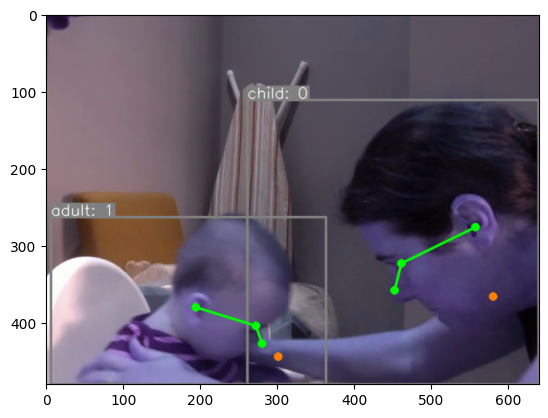

In [11]:
framenumber = 34
bboxlabels, bboxes, xycs = utils.getframekpts(df, framenumber)

print(bboxlabels)
print(bboxes)
print(xycs)

video = cv2.VideoCapture(VIDEO_FILE)
video.set(cv2.CAP_PROP_POS_FRAMES, framenumber)
success, image = video.read()
video.release()

image = display.drawOneFrame(image, bboxlabels, bboxes, xycs)

plt.imshow(image)

## 0.1.2 model.track()

YoloV8 also comes with a `model.track` method. This aims to keep track of all identified people (and other objects?) over the course of a video. 

This is pretty easy instead of calling 
`results = model(video_path, stream=True)`

we can call
`results = model.track(video_path, stream=True)`

https://docs.ultralytics.com/modes/track/#persisting-tracks-loop

Here's an inline example of it working..

In [ ]:
# Open the video file
video_path = VIDEO_FILE
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

# 0.2 Extracting Speech

We extract the audio and then use off the shelf speech recognition to extract the text.

### 0.2.1 Extracting audio with moviepy

MoviePy is basic movie editing tool that wraps ffmpeg and allows us to extract audio from video.


In [12]:
import moviepy.editor as mp

video_path = VIDEO_FILE
output_ext = "mp3"
output_ext = "wav"

filename = os.path.splitext(video_path)[0]
clip = mp.VideoFileClip( video_path)
audio_file = os.path.join( f"{filename}.{output_ext}")
clip.audio.write_audiofile(audio_file)
clip.close()


MoviePy - Writing audio in ../data/demo/2UWdXP.joke1.rep2.take1.Peekaboo.wav


MoviePy - Done.


In [13]:
#playback the audio file
from IPython.display import Audio
Audio(audio_file)

# 0.7 visualising data over time

some of the calculations to help us visualise the movement of participants over time. 


In [14]:
#function that calculates the average x and y coordinates of a set of keypoints (where confidence score is above a threshold)
xycs = np.array([[1,2,0.9],
                 [2,3,0.8],
                 [3,4,0.7],
                 [4,5,0.6],
                 [5,6,0.5],
                 [6,7,0.4],
                 [7,8,0.3],
                 [8,9,0.2],
                 [9,10,0.1]])

avgx, avgy = calcs.avgxys(xycs, threshold = 0.5)

print(avgx, avgy)

2.5 3.5
